# Adult comparison

Comparing the results on the Attacks on Adult using the `Hard Voting Classifier`

In [1]:
from pathlib import Path
import sys
from numba import njit

UTILS_RELATIVE_PATH = "../../../../"
sys.path.append(UTILS_RELATIVE_PATH)

MLEM_RELATIVE_PATH = "../../../../.."
sys.path.append(MLEM_RELATIVE_PATH)

LIME_RELATIVE_PATH = "../../../../../lime/"
sys.path.append(LIME_RELATIVE_PATH)

import logging
logging.disable('DEBUG')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from mlem.ensemble import HardVotingClassifier
from utils.attack_evaluation import evaluate_attack
from utils.models import load_pickle_bz2
from utils.dataloading.attack_models import load_attack_models

# Loading the Adult data

In [7]:
from utils.dataloading.adult import load_adult_data, load_adult_randomforest # type: ignore

BB = load_adult_randomforest()
BB_DATA = load_adult_data()

print(classification_report(BB_DATA['y_test'], BB.predict(BB_DATA['X_test'])))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8157
           1       0.79      0.61      0.69      2690

    accuracy                           0.86     10847
   macro avg       0.84      0.78      0.80     10847
weighted avg       0.86      0.86      0.86     10847



##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is the same used to train the Decision Trees

In [4]:
PATH = Path('../../decision_tree_dataset_no3std/adult/experiment_output/')
assert PATH.exists()

In [5]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [6]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.92      0.79     24558
         out       0.31      0.09      0.14     10526

    accuracy                           0.67     35084
   macro avg       0.51      0.50      0.47     35084
weighted avg       0.58      0.67      0.60     35084


Class 0
              precision    recall  f1-score   support

          in       0.70      0.97      0.81     20131
         out       0.30      0.03      0.05      8665

    accuracy                           0.69     28796
   macro avg       0.50      0.50      0.43     28796
weighted avg       0.58      0.69      0.58     28796


Class 1
              precision    recall  f1-score   support

          in       0.71      0.65      0.68      4427
         out       0.31      0.38      0.34      1861

    accuracy                           0.57      6288
   macro avg       0.51      0.51      0.51      6288
weighted avg       0.60      0.57      0.58 

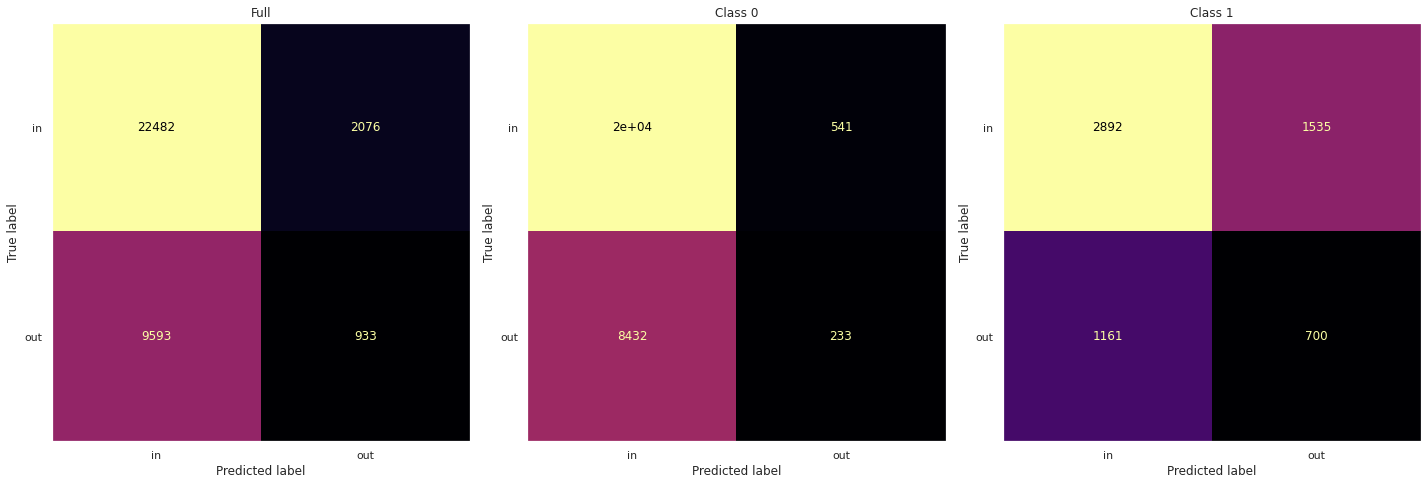

In [7]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Lime Generated` Attack: `Lime Generated` Explainer: `Decision Tree` Filter: `True`

In [8]:
PATH = Path('../../decision_tree_dataset/adult/experiment_output/')
assert PATH.exists()

In [9]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [10]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.15      0.25     24686
         out       0.30      0.85      0.44     10577

    accuracy                           0.36     35263
   macro avg       0.50      0.50      0.34     35263
weighted avg       0.58      0.36      0.31     35263


Class 0
              precision    recall  f1-score   support

          in       0.69      0.11      0.19     19956
         out       0.30      0.89      0.45      8607

    accuracy                           0.34     28563
   macro avg       0.50      0.50      0.32     28563
weighted avg       0.57      0.34      0.27     28563


Class 1
              precision    recall  f1-score   support

          in       0.71      0.33      0.45      4730
         out       0.30      0.68      0.41      1970

    accuracy                           0.43      6700
   macro avg       0.50      0.50      0.43      6700
weighted avg       0.59      0.43      0.44 

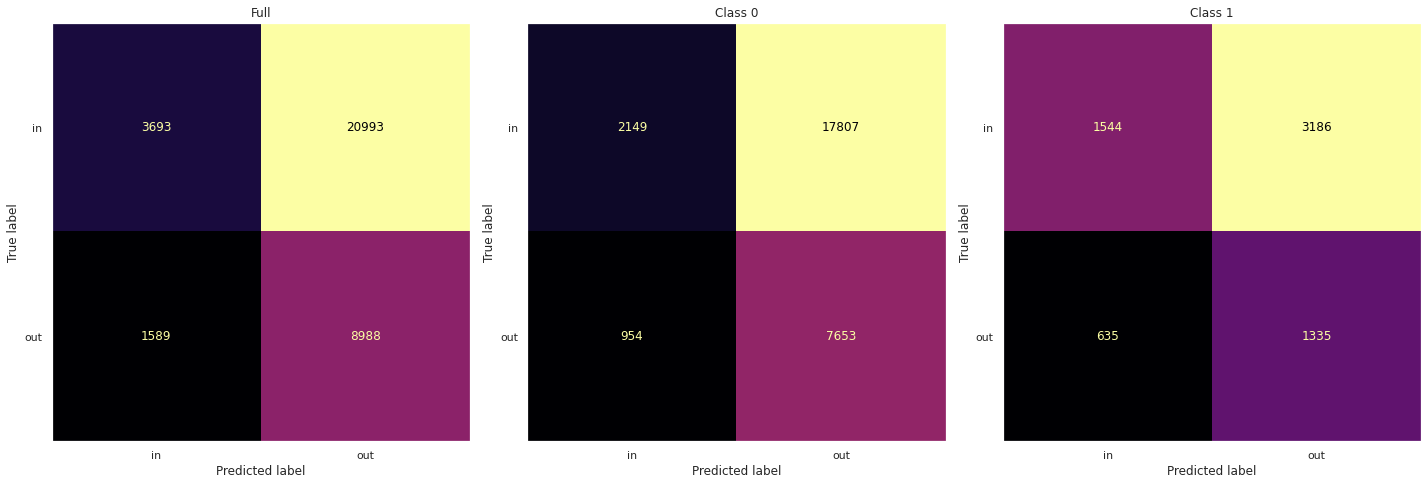

In [11]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [12]:
PATH = Path('../../statistical_no3std/adult/experiment_output/')
assert PATH.exists()

In [13]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [14]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.09      0.16     24982
         out       0.30      0.91      0.45     10680

    accuracy                           0.33     35662
   macro avg       0.50      0.50      0.30     35662
weighted avg       0.58      0.33      0.25     35662


Class 0
              precision    recall  f1-score   support

          in       0.69      0.05      0.10     20165
         out       0.30      0.94      0.46      8663

    accuracy                           0.32     28828
   macro avg       0.50      0.50      0.28     28828
weighted avg       0.57      0.32      0.21     28828


Class 1
              precision    recall  f1-score   support

          in       0.70      0.23      0.35      4817
         out       0.29      0.77      0.43      2017

    accuracy                           0.39      6834
   macro avg       0.50      0.50      0.39      6834
weighted avg       0.58      0.39      0.37 

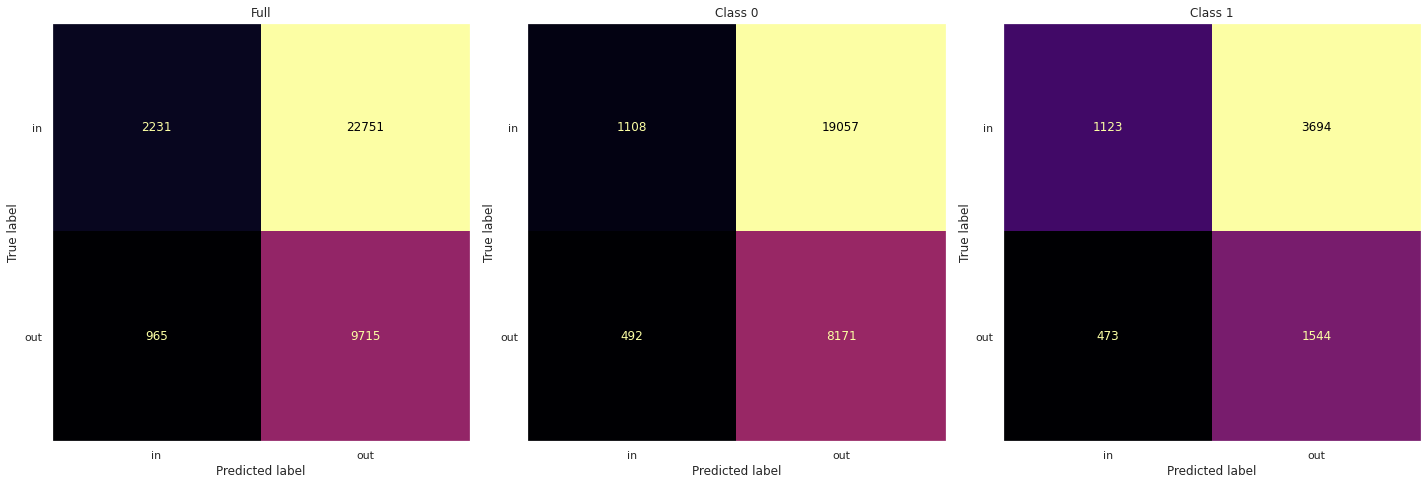

In [15]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Black Box Train` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True`

Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [16]:
PATH = Path('../../statistical/adult/experiment_output/')
assert PATH.exists()

In [17]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [18]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     24722
         out       0.31      0.06      0.11     10576

    accuracy                           0.68     35298
   macro avg       0.50      0.50      0.45     35298
weighted avg       0.58      0.68      0.59     35298


Class 0
              precision    recall  f1-score   support

          in       0.70      0.94      0.80     19967
         out       0.31      0.06      0.10      8587

    accuracy                           0.68     28554
   macro avg       0.50      0.50      0.45     28554
weighted avg       0.58      0.68      0.59     28554


Class 1
              precision    recall  f1-score   support

          in       0.71      0.92      0.80      4755
         out       0.31      0.08      0.13      1989

    accuracy                           0.67      6744
   macro avg       0.51      0.50      0.47      6744
weighted avg       0.59      0.67      0.60 

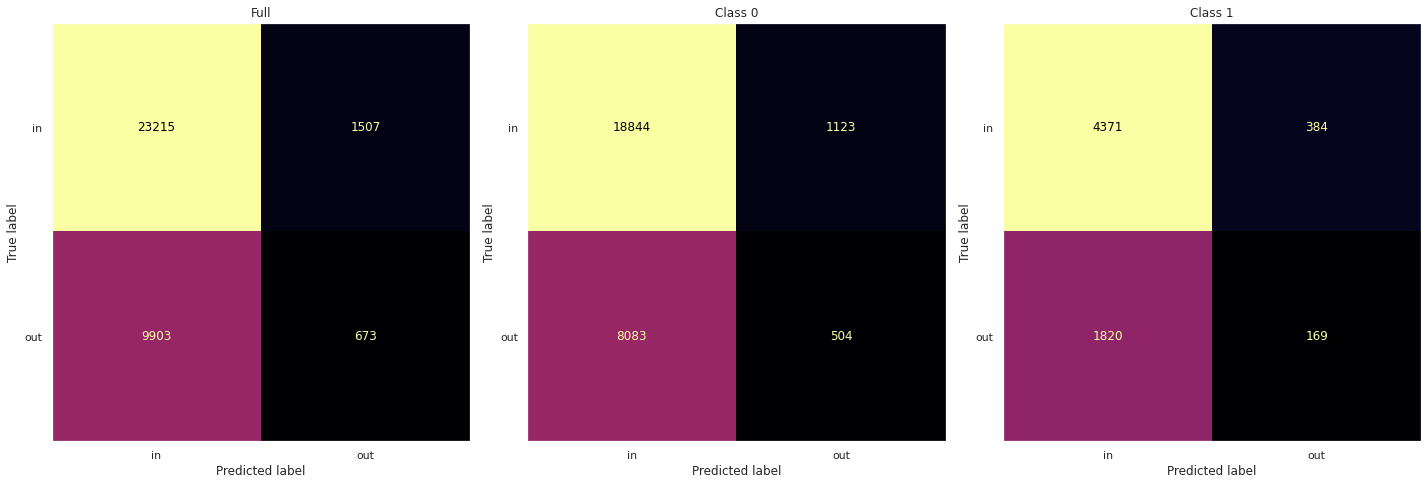

In [19]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `False`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [20]:
PATH = Path('../../statistical_noisy/adult/experiment_output/')
assert PATH.exists()

In [21]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [22]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.24      0.35     24656
         out       0.30      0.77      0.43     10570

    accuracy                           0.40     35226
   macro avg       0.50      0.50      0.39     35226
weighted avg       0.58      0.40      0.38     35226


Class 0
              precision    recall  f1-score   support

          in       0.70      0.05      0.10     19801
         out       0.30      0.95      0.46      8532

    accuracy                           0.32     28333
   macro avg       0.50      0.50      0.28     28333
weighted avg       0.58      0.32      0.21     28333


Class 1
              precision    recall  f1-score   support

          in       0.70      0.98      0.82      4855
         out       0.32      0.02      0.04      2038

    accuracy                           0.70      6893
   macro avg       0.51      0.50      0.43      6893
weighted avg       0.59      0.70      0.59 

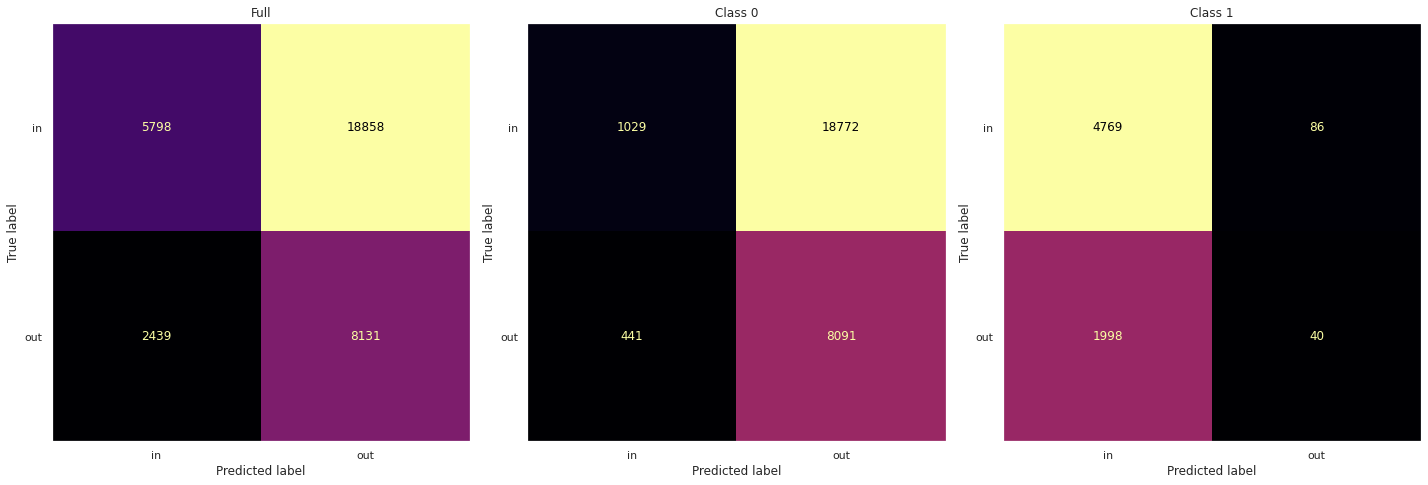

In [23]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Statistical` on `Noisy dataset` Attack: `Statistical` Explainer: `Decision Tree` Filter: `True`
Here the attack dataset is a newly generated statistical one, not the same used to create the `DTs`

In [24]:
PATH = Path('../../statistical_noisy_filter/adult/experiment_output/')
assert PATH.exists()

In [25]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [26]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.31      0.43     24376
         out       0.30      0.69      0.42     10459

    accuracy                           0.42     34835
   macro avg       0.50      0.50      0.42     34835
weighted avg       0.58      0.42      0.42     34835


Class 0
              precision    recall  f1-score   support

          in       0.69      0.13      0.22     19422
         out       0.30      0.86      0.45      8379

    accuracy                           0.35     27801
   macro avg       0.50      0.50      0.33     27801
weighted avg       0.57      0.35      0.29     27801


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4954
         out       0.33      0.01      0.01      2080

    accuracy                           0.70      7034
   macro avg       0.52      0.50      0.42      7034
weighted avg       0.59      0.70      0.58 

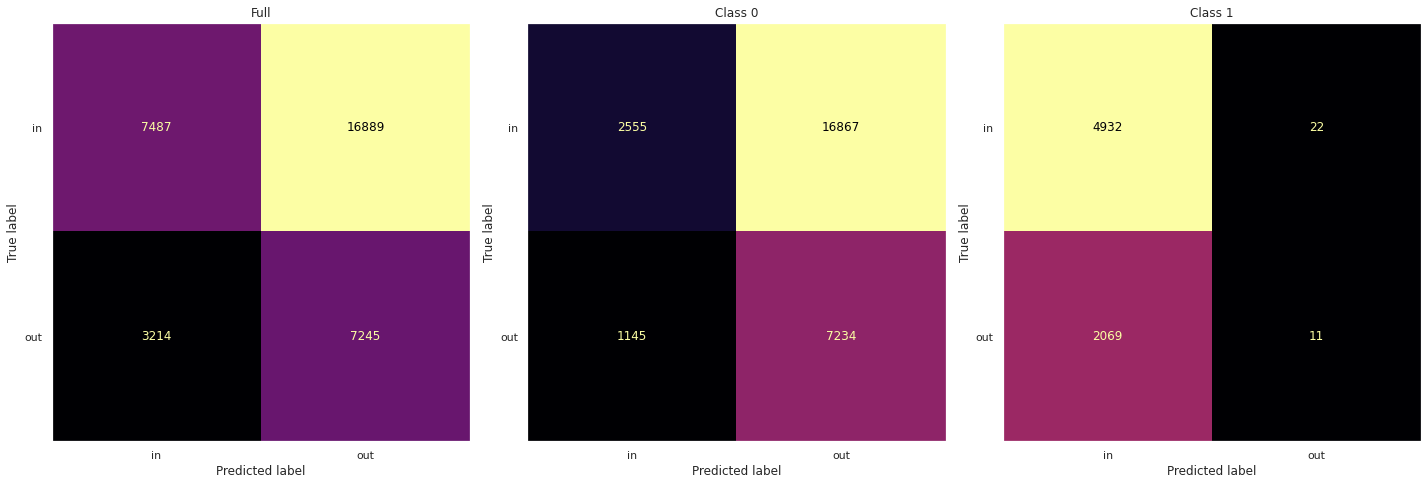

In [27]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `False`

Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [28]:
PATH = Path('../../trepan/noisy/adult/experiment_output/')
assert PATH.exists()

In [29]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [30]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.21      0.33     25186
         out       0.30      0.79      0.44     10787

    accuracy                           0.39     35973
   macro avg       0.50      0.50      0.38     35973
weighted avg       0.58      0.39      0.36     35973


Class 0
              precision    recall  f1-score   support

          in       0.69      0.02      0.04     20231
         out       0.30      0.98      0.46      8706

    accuracy                           0.31     28937
   macro avg       0.49      0.50      0.25     28937
weighted avg       0.57      0.31      0.17     28937


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4955
         out       0.33      0.01      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.52      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

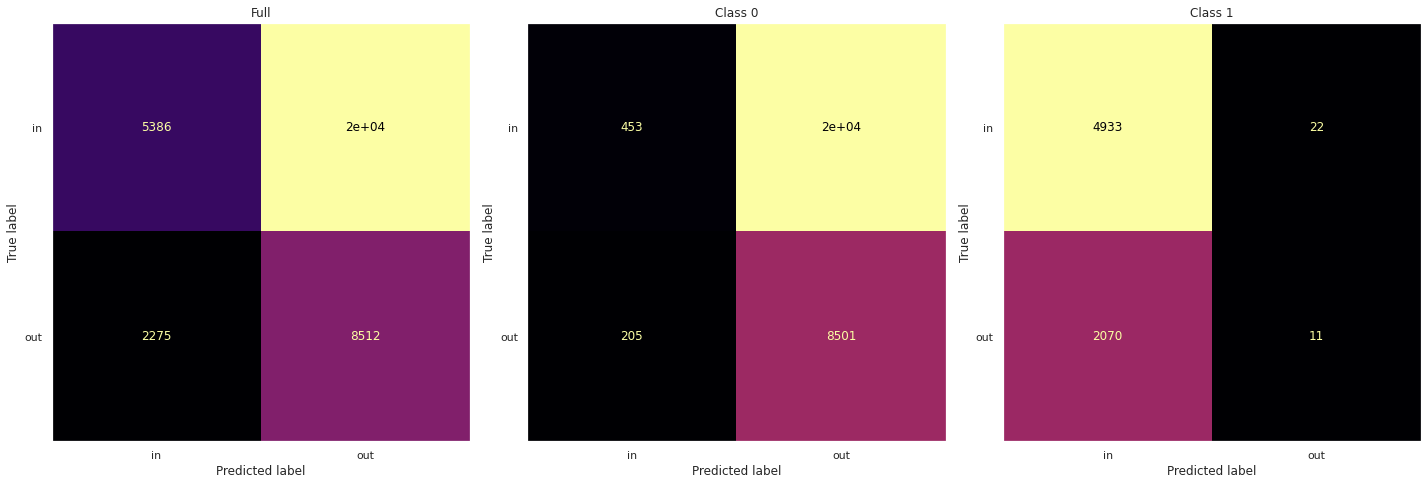

In [31]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Noisy` Explainer: `Decision Tree` Filter: `True`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [32]:
PATH = Path('../../trepan/noisy_filtering/adult/experiment_output/')
assert PATH.exists()

In [33]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [34]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.80      0.75      7654
         out       0.32      0.22      0.26      3320

    accuracy                           0.62     10974
   macro avg       0.51      0.51      0.50     10974
weighted avg       0.59      0.62      0.60     10974


Class 0
              precision    recall  f1-score   support

          in       0.69      0.43      0.53      2700
         out       0.32      0.58      0.41      1241

    accuracy                           0.48      3941
   macro avg       0.51      0.51      0.47      3941
weighted avg       0.57      0.48      0.49      3941


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4954
         out       0.28      0.00      0.01      2079

    accuracy                           0.70      7033
   macro avg       0.49      0.50      0.42      7033
weighted avg       0.58      0.70      0.58 

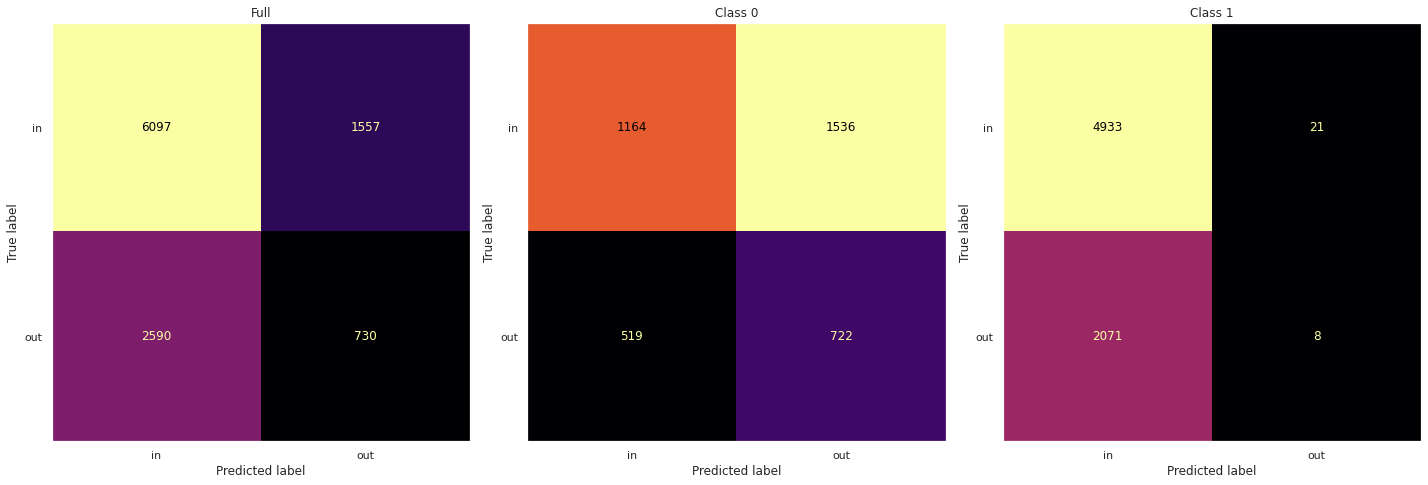

In [35]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [36]:
PATH = Path('../../trepan/statistical/adult/experiment_output/')
assert PATH.exists()

In [37]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [38]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.83      0.76     24908
         out       0.30      0.17      0.21     10664

    accuracy                           0.63     35572
   macro avg       0.50      0.50      0.49     35572
weighted avg       0.58      0.63      0.60     35572


Class 0
              precision    recall  f1-score   support

          in       0.70      0.98      0.82     20014
         out       0.30      0.02      0.03      8606

    accuracy                           0.69     28620
   macro avg       0.50      0.50      0.43     28620
weighted avg       0.58      0.69      0.58     28620


Class 1
              precision    recall  f1-score   support

          in       0.71      0.20      0.32      4894
         out       0.30      0.80      0.43      2058

    accuracy                           0.38      6952
   macro avg       0.50      0.50      0.37      6952
weighted avg       0.58      0.38      0.35 

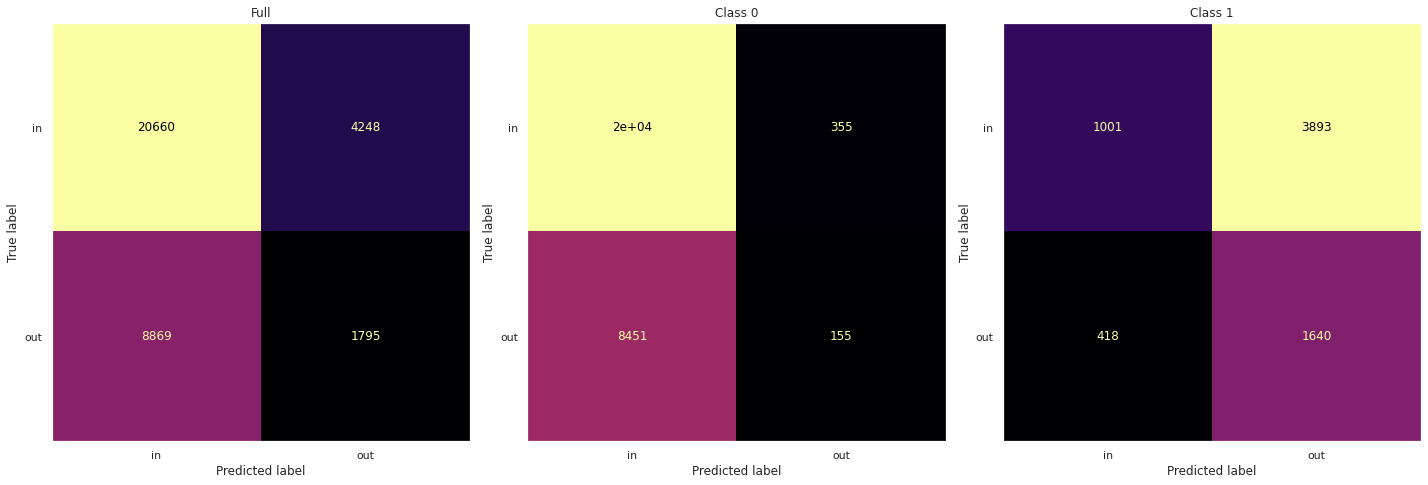

In [39]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True`
Here the trepan dataset was balanced and consisting of $\approx 7000$ elements.

In [40]:
PATH = Path('../../trepan/statistical_filtering/adult/experiment_output/')
assert PATH.exists()

In [41]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [42]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.21      0.32     24618
         out       0.30      0.80      0.44     10538

    accuracy                           0.38     35156
   macro avg       0.50      0.50      0.38     35156
weighted avg       0.58      0.38      0.36     35156


Class 0
              precision    recall  f1-score   support

          in       0.68      0.05      0.08     20148
         out       0.30      0.95      0.46      8685

    accuracy                           0.32     28833
   macro avg       0.49      0.50      0.27     28833
weighted avg       0.57      0.32      0.20     28833


Class 1
              precision    recall  f1-score   support

          in       0.71      0.94      0.81      4470
         out       0.31      0.06      0.10      1853

    accuracy                           0.68      6323
   macro avg       0.51      0.50      0.46      6323
weighted avg       0.59      0.68      0.60 

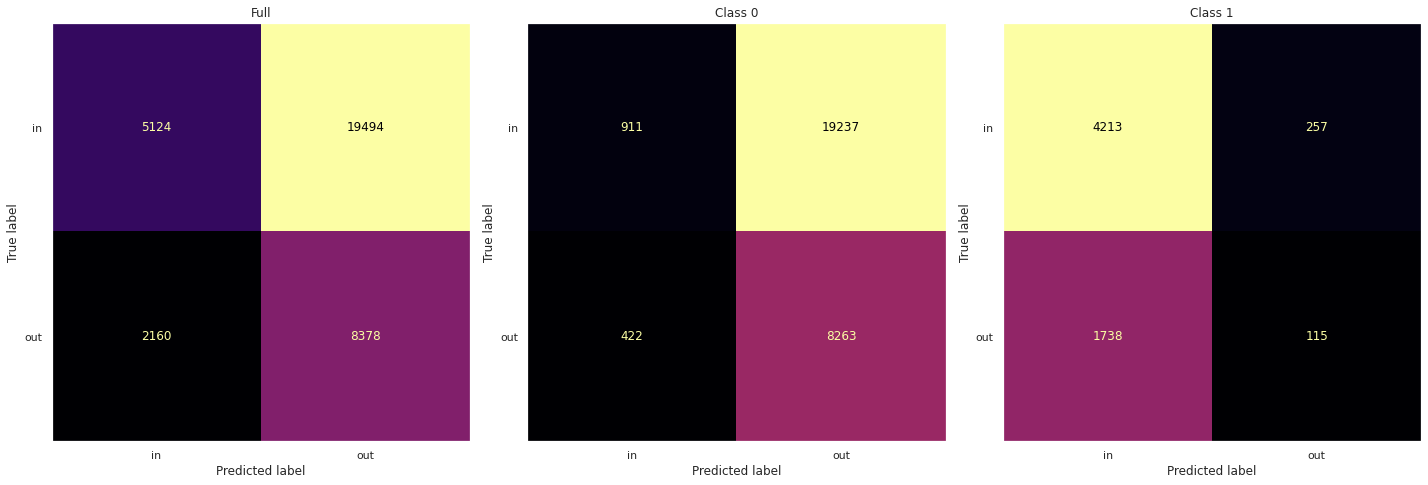

In [43]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `True`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [44]:
PATH = Path('../../trepan/trepan_statistical_filtering_nobalanced/adult/experiment_output/')
assert PATH.exists()

In [45]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [46]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     24585
         out       0.32      0.01      0.03     10540

    accuracy                           0.70     35125
   macro avg       0.51      0.50      0.42     35125
weighted avg       0.59      0.70      0.58     35125


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     19630
         out       0.32      0.02      0.03      8459

    accuracy                           0.69     28089
   macro avg       0.51      0.50      0.42     28089
weighted avg       0.59      0.69      0.58     28089


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4955
         out       0.31      0.00      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.51      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

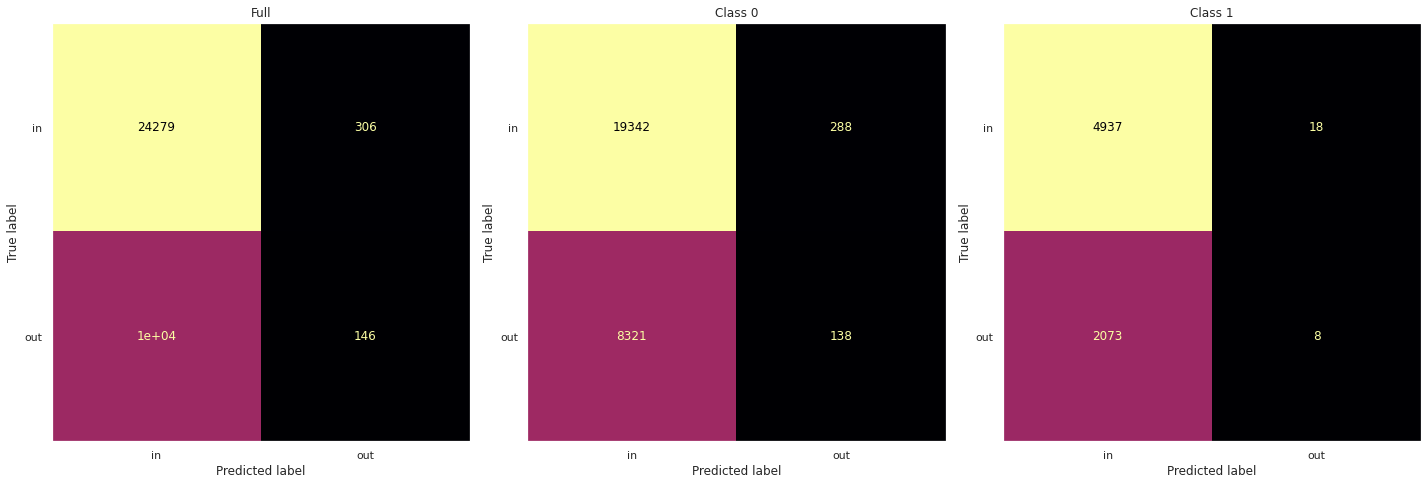

In [47]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)

##### Data: `Trepan` on `Black Box Train` Attack: `Statistical` on `Black Box Train` Explainer: `Decision Tree` Filter: `False`

Here I didn't balanced the dataset generated by trepan and for each `Decision Tree` I generated a dataset of $80,000$ elements.

In [3]:
PATH = Path('../../trepan/trepan_statistical_nobalanced/adult/experiment_output/')
assert PATH.exists()

In [4]:
attack_0, attack_1, instances = load_attack_models(PATH)

In [5]:
ensemble0 = HardVotingClassifier(attack_0)
ensemble1 = HardVotingClassifier(attack_1)

report full
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     24585
         out       0.32      0.01      0.03     10540

    accuracy                           0.70     35125
   macro avg       0.51      0.50      0.42     35125
weighted avg       0.59      0.70      0.58     35125


Class 0
              precision    recall  f1-score   support

          in       0.70      0.99      0.82     19630
         out       0.32      0.02      0.03      8459

    accuracy                           0.69     28089
   macro avg       0.51      0.50      0.42     28089
weighted avg       0.59      0.69      0.58     28089


Class 1
              precision    recall  f1-score   support

          in       0.70      1.00      0.83      4955
         out       0.31      0.00      0.01      2081

    accuracy                           0.70      7036
   macro avg       0.51      0.50      0.42      7036
weighted avg       0.59      0.70      0.58 

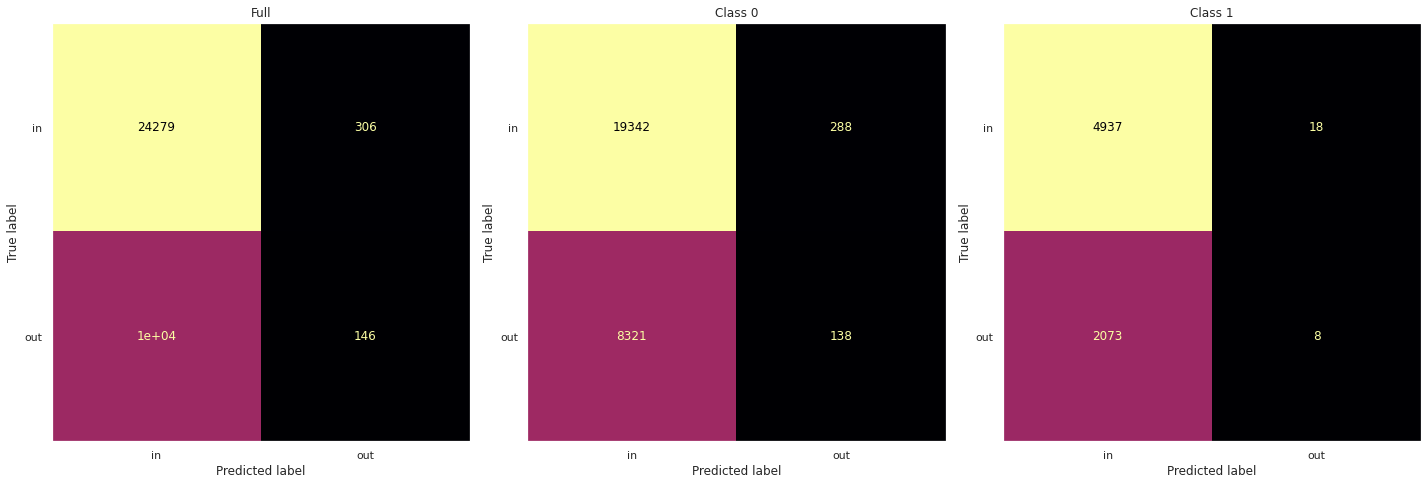

In [8]:
evaluate_attack(ensemble0, ensemble1, BB, BB_DATA)